## Introduction to Linear Programming

Linear programming (LP) is a powerful mathematical technique used to optimize a linear objective function, subject to a set of linear constraints. It is commonly applied to problems involving resource allocation, cost minimization, or profit maximization.

---

## Four Primary Elements of LP

### 1. **Decision Variables**
These are the unknowns we aim to determine. They represent quantities that can be adjusted to achieve the best outcome.

**Example**  
Let:  
- $x_1$: number of chairs produced  
- $x_2$: number of tables produced

---

### 2. **Objective Function**
This is the function we want to **maximize** or **minimize**.

**Example (maximize profit):**  
$$
\text{Maximize } Z = 50x_1 + 100x_2
$$

Where:  
- $Z$: total profit  
- $50x_1$: profit from chairs  
- $100x_2$: profit from tables

---

### 3. **Constraints**
These are the limitations or requirements of the system, usually expressed as linear inequalities.

**Examples:**


- Labour constraint: The company has 200 hours of labour available weekly. Each chair requires 5 hours, and each table requires 10 hours.
  $$
  5x_1 + 10x_2 \leq 200
  $$
- Wood constraint: The company has 80 units of wood available. Each chair requires 1 unit, and each table requires 3 units.

  $$
  1x_1 + 3x_2 \leq 80
  $$
- Demand constraint: The company can sell a maximum of 20 tables per week.
  $$
  x_2 \leq 20
  $$
- Non-negativity: Production quantities cannot be negative. 
  $$
  x_1 \geq 0,\quad x_2 \geq 0
  $$

---

### 4. **Feasible Region**
This is the region that satisfies **all constraints**. It contains every possible solution that is valid for the problem.

The **optimal solution** lies at a **corner (vertex)** of this region.

In our furniture manufacturing example, the feasible region would be the area in the x₁-x₂ plane that satisfies all defined constraints. Note that x₁-x₂ plane is a graphical representation of the decision space, where each point on the plane corresponds to a specific combination of chair and table production levels:


  $$
  5x_1 + 10x_2 \leq 200
  $$
 
  $$
  1x_1 + 3x_2 \leq 80
  $$
 
  $$
  x_2 \leq 20
  $$
 
  $$
  x_1 \geq 0,\quad x_2 \geq 0
  $$



We can visualize the feasible region using Python with the help of the matplotlib library. Here's an example code snippet that plots the constraints and the feasible region:

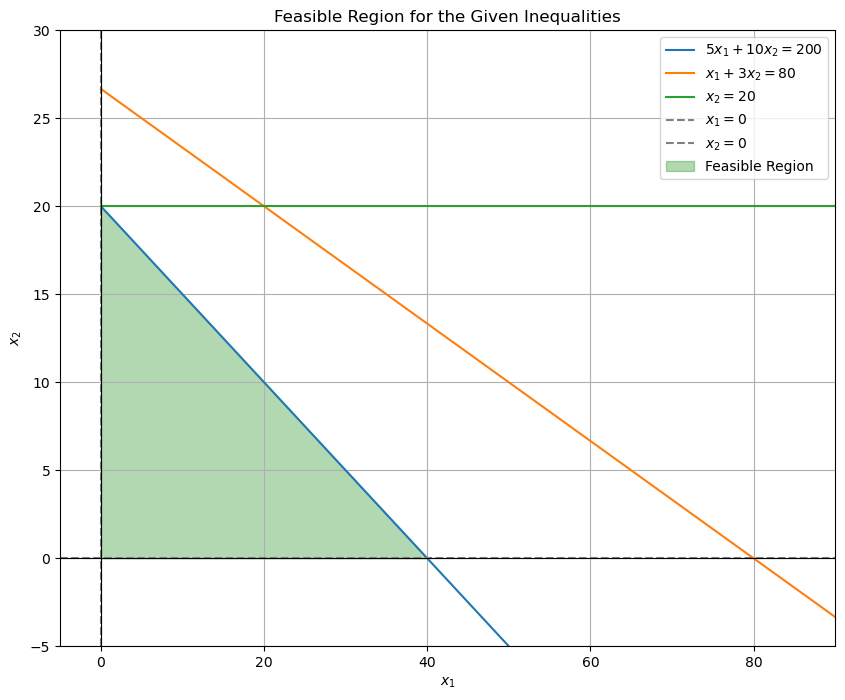

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
def constraint1(x1):
    return (200 - 5*x1) / 10

def constraint2(x1):
    return (80 - x1) / 3

def constraint3(x1):
    return 20 * np.ones_like(x1)

# What does 20 * np.ones_like(x1) do?
# By multiplying 20 with the array of ones created by np.ones_like(x1), 
# we create an array where each element is 20. This array has the same shape as x1,
# so it can be broadcasted to the same shape as x1.

# Generate x1 values
x1 = np.linspace(0, 90, 400)

# Evaluate the constraints
C1 = constraint1(x1)
C2 = constraint2(x1)
C3 = constraint3(x1)

# Create the plot figure and axes
plt.figure(figsize=(10, 8))

# Plot the lines representing the boundaries of the inequalities
plt.plot(x1, C1, label=r'$5x_1 + 10x_2 = 200$') 
plt.plot(x1, C2, label=r'$x_1 + 3x_2 = 80$')   
plt.plot(x1, C3, label=r'$x_2 = 20$')         

# Plot the non-negativity constraints (x1 >= 0 and x2 >= 0)
plt.axvline(x=0, color='gray', linestyle='--', label=r'$x_1 = 0$') 
plt.axhline(y=0, color='gray', linestyle='--', label=r'$x_2 = 0$') 

# Fill the feasible region
x2_lower_bound = np.maximum(0, x1 * 0) 
x2_upper_bound = np.minimum(C1, np.minimum(C2, C3))
x1_feasible_indices = x1 >= 0
x1_filtered = x1[x1_feasible_indices]
x2_upper_bound_filtered = x2_upper_bound[x1_feasible_indices]
x2_lower_bound_filtered = x2_lower_bound[x1_feasible_indices]
plt.fill_between(x1_filtered, x2_lower_bound_filtered, x2_upper_bound_filtered,
                 where=(x2_upper_bound_filtered >= x2_lower_bound_filtered), 
                 color='green', alpha=0.3, label='Feasible Region')

# Set plot limits for better visualization
plt.xlim(-5, 90) 
plt.ylim(-5, 30) 

# Add labels and title to the plot
plt.xlabel(r'$x_1$') 
plt.ylabel(r'$x_2$') 
plt.title('Feasible Region for the Given Inequalities') 

# Display the legend to identify each line and the feasible region
plt.legend()

# Add a grid for easier reading of values
plt.grid(True)

# Draw thicker black lines for the x and y axes at x=0 and y=0
plt.axvline(x=0, color='black', linewidth=0.8)
plt.axhline(y=0, color='black', linewidth=0.8)

# Save the plot to a file
# plt.savefig('feasible_region.png')

# Show the plot (optional, as it's saved to a file)
plt.show()

## Interplay of LP Concepts

Together:

- Decision variables define the solution space.
- Constraints limit this space.
- The objective function defines what we’re optimizing.
- The feasible region is where all constraints overlap — and where the optimal solution exists.

---


## The Simplex Method: Introduction and Application

The **Simplex Method** is a widely used algorithm for solving linear programming (LP) problems, especially when the problem involves more than two variables and cannot be solved graphically.

### Why Use the Simplex Method?
Graphical methods only work for two-variable problems. The Simplex Method, however, scales to high-dimensional problems and is computationally efficient.

---

### Slack Variables
To convert **inequality constraints** into **equality constraints** (required by the Simplex Method), we introduce **slack variables**.

#### Example:
Original constraint:
$$
x_1 \leq 4
$$

Add a slack variable $x_3$ to turn it into an equation:
$$
x_1 + x_3 = 4 \quad \text{with } x_3 \geq 0
$$

This slack variable represents the **unused portion** of the constraint (e.g., unused resources).

---

### Problem Example

**Original Model:**

Maximize:
$$
Z = 3x_1 + 5x_2
$$

Subject to:
- $x_1 \leq 4$
- $2x_2 \leq 12$
- $3x_1 + 2x_2 \leq 18$
- $x_1, x_2 \geq 0$

---

### Augmented Model (with slack variables):
- Add $x_3, x_4, x_5$ to transform inequalities into equalities:

$$
\begin{align*}
x_1 + x_3 &= 4 \\
2x_2 + x_4 &= 12 \\
3x_1 + 2x_2 + x_5 &= 18 \\
x_1, x_2, x_3, x_4, x_5 &\geq 0
\end{align*}
$$

---

### Interpretation of Slack Variables:
- If a slack variable = 0 → the constraint is **binding** (tight).
- If > 0 → the constraint is **non-binding** (slack remains).
- If < 0 → **infeasible** solution.

---

Next, we solve this using the **Simplex Method** implemented in Python's SciPy library.



## Step 2: Four Primary Elements of Linear Programming

1. **Decision Variables**: Unknowns we solve for (e.g., number of products to make).
2. **Objective Function**: What we maximize or minimize (e.g., total profit).
3. **Constraints**: Limits or restrictions (e.g., labor, material).
4. **Feasible Region**: All combinations of variables that satisfy constraints.



## Step 3: LP Example – Furniture Production

A furniture company produces chairs and tables.

- Chairs generate \$50 profit (x₁)
- Tables generate \$100 profit (x₂)

**Objective Function:**

Maximize  
\[
Z = 50x_1 + 100x_2
\]

**Constraints:**

- Labor:  
\[
5x_1 + 10x_2 \leq 200
\]

- Wood:  
\[
x_1 + 3x_2 \leq 80
\]

- Market demand:  
\[
x_2 \leq 20
\]

- Non-negativity:  
\[
x_1 \geq 0, \quad x_2 \geq 0
\]



## Step 4: Solve the LP Using Google OR-Tools

We now solve the LP problem using the OR-Tools solver.


In [1]:

from ortools.linear_solver import pywraplp



# Create solver instance
solver = pywraplp.Solver.CreateSolver("GLOP")

# Variables
x1 = solver.NumVar(0, solver.infinity(), "x1")  # chairs
x2 = solver.NumVar(0, solver.infinity(), "x2")  # tables

# Constraints
solver.Add(5 * x1 + 10 * x2 <= 200)  # labor
solver.Add(x1 + 3 * x2 <= 80)        # wood
solver.Add(x2 <= 20)                 # market demand

# Objective
solver.Maximize(50 * x1 + 100 * x2)

# Solve
status = solver.Solve()

# Results
if status == pywraplp.Solver.OPTIMAL:
    print("Optimal Solution:")
    print(f"x1 (Chairs): {x1.solution_value()}")
    print(f"x2 (Tables): {x2.solution_value()}")
    print(f"Maximum Profit: ${solver.Objective().Value()}")
else:
    print("No optimal solution found.")


Optimal Solution:
x1 (Chairs): 40.0
x2 (Tables): 0.0
Maximum Profit: $2000.0
